Set CUDA:0 as current device.
14496(22.12%) pixels in layer 0 are masked as skipped
15980(24.38%) pixels in layer 1 are masked as skipped


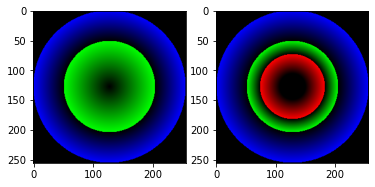

In [12]:
import sys
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

rootdir = os.path.abspath(sys.path[0] + '/../')
sys.path.append(rootdir)
torch.cuda.set_device(0)
print("Set CUDA:%d as current device." % torch.cuda.current_device())
torch.autograd.set_grad_enabled(False)

from utils import img
from utils import device
from utils.view import *
from components.foveation import Foveation


foveation = Foveation([20, 45, 110], [(256, 256), (256, 256), (256, 230)], (1600, 1440))
layers_mask = foveation.get_layers_mask()
plt.figure()
for i, mask in enumerate(layers_mask):
    colored_mask = torch.zeros(mask.size(0), mask.size(1), 3, device=mask.device)
    c = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]], device=mask.device)
    for bi in range(3):
        region = torch.logical_and(mask > bi, mask < bi + 1)
        colored_mask[region] = c[bi] * (mask[region][..., None] - bi)
    plt.subplot(1, len(layers_mask), i + 1)
    img.plot(colored_mask)
    n_skipped = torch.sum(mask < 0)
    n_tot = len(mask.flatten())
    print (f"{n_skipped}({n_skipped / n_tot * 100:.2f}%) pixels in layer {i} are masked as skipped")